<a href="https://colab.research.google.com/github/likhit2804/Crop-Recommendation-System-Using-Python-and-Scikit-learn/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_df=pd.read_csv("/content/Train.csv")

In [ ]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train_df.duplicated().sum()

0

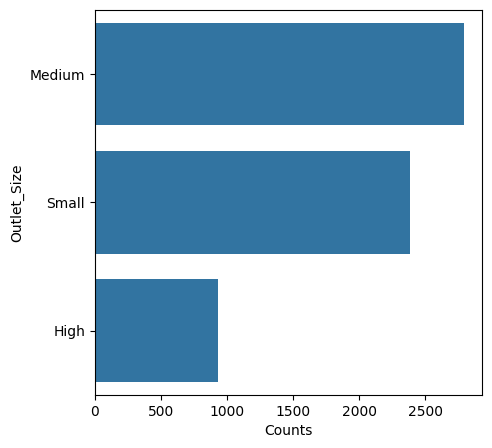

In [ ]:
outlet_size_counts = train_df['Outlet_Size'].value_counts().reset_index()
outlet_size_counts.columns = ['Outlet_Size', 'Counts']

plt.figure(figsize=(5, 5))

# Create the horizontal bar plot
ax = sns.barplot(x='Counts', y='Outlet_Size', data=outlet_size_counts)


<Axes: ylabel='Outlet_Size'>

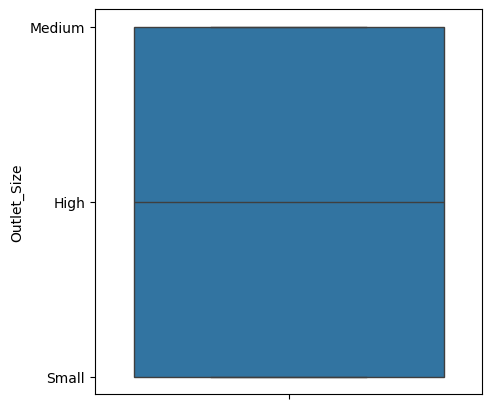

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=train_df["Outlet_Size"])

In [ ]:
for i in train_df.columns[train_df.dtypes=="object"]:
  train_df[i]=train_df[i].astype("category")


In [ ]:
train_df["Outlet_Size"].fillna(train_df["Outlet_Size"].mode()[0],inplace=True)


Filling null values with mode values as column type is categorical

In [ ]:
grp=train_df.groupby("Item_Identifier")
grp.get_group("DRA12")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Medium,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Medium,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308


In [ ]:
grp.get_group("FDC44")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1094,FDC44,15.6,Low Fat,0.000000,Fruits and Vegetables,111.9518,OUT049,1999,Medium,Tier 1,Supermarket Type1,2163.1842
3708,FDC44,15.6,Low Fat,0.172453,Fruits and Vegetables,115.1518,OUT013,1987,High,Tier 3,Supermarket Type1,683.1108
4504,FDC44,NaN,Low Fat,0.171761,Fruits and Vegetables,115.7518,OUT027,1985,Medium,Tier 3,Supermarket Type3,5351.0346
5626,FDC44,15.6,Low Fat,0.172947,Fruits and Vegetables,114.1518,OUT045,2002,Medium,Tier 2,Supermarket Type1,1821.6288
6967,FDC44,15.6,Low Fat,0.173573,Fruits and Vegetables,114.4518,OUT017,2007,Medium,Tier 2,Supermarket Type1,2390.8878
7577,FDC44,15.6,Low Fat,0.172597,Fruits and Vegetables,114.8518,OUT046,1997,Small,Tier 1,Supermarket Type1,2163.1842


we can see that products with same Item_Identifier has same weight

In [ ]:
def fill_missing_weight(df, grp):
  def g(group):

    return group.fillna(group.bfill())


  return df.groupby('Item_Identifier')['Item_Weight'].transform(g)

train_df["Item_Weight"] = fill_missing_weight(train_df.copy(), grp)

In [ ]:
train_df.isnull().sum()

Item_Identifier                0
Item_Weight                  304
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

The remaining null values are single items , we can just drop those values

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
for i in train_df.columns[train_df.dtypes=="category"]:
  print(train_df[i].unique())

['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', ..., 'FDD28', 'FDU43', 'NCF55', 'NCW30', 'NCW05']
Length: 1555
Categories (1559, object): ['DRA12', 'DRA24', 'DRA59', 'DRB01', ..., 'NCZ41', 'NCZ42', 'NCZ53',
                            'NCZ54']
['Low Fat', 'Regular', 'low fat', 'LF', 'reg']
Categories (5, object): ['LF', 'Low Fat', 'Regular', 'low fat', 'reg']
['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', ..., 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
Length: 16
Categories (16, object): ['Baking Goods', 'Breads', 'Breakfast', 'Canned', ..., 'Seafood', 'Snack Foods',
                          'Soft Drinks', 'Starchy Foods']
['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']
Categories (10, object): ['OUT010', 'OUT013', 'OUT017', 'OUT018', ..., 'OUT035', 'OUT045', 'OUT046',
                          'OUT049']
['Medium', 'High', 'Small']
Categories (3, object): ['High', 'Medium', 'Small']
['Tier 1', 'T

We can see that LF and low fat are same as Low Fat and reg is same as Regular

In [ ]:
replacements = {
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
}

train_df["Item_Fat_Content"].replace(replacements, inplace=True)

In [ ]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<Axes: xlabel='Item_Fat_Content'>

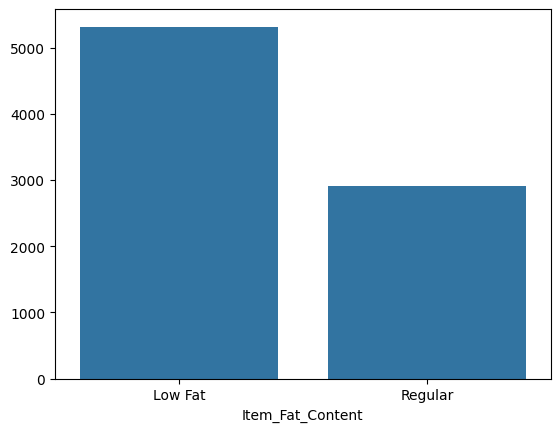

In [ ]:
Item_Fat_Content_size=train_df.groupby("Item_Fat_Content").size()
sns.barplot(data=Item_Fat_Content_size)

People buy more low fat items compared to Regular Fat items.

<Axes: xlabel='Outlet_Location_Type'>

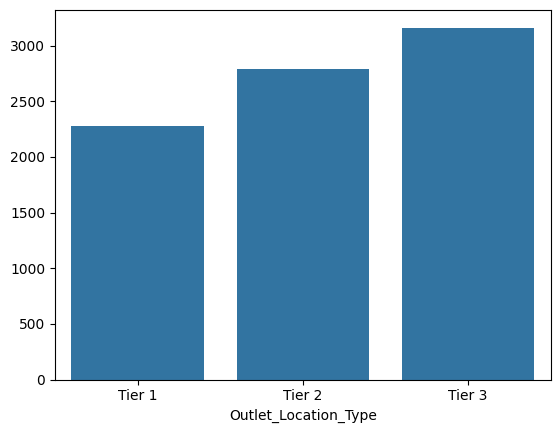

In [ ]:

Outlet_Location_Type_size=train_df.groupby("Outlet_Location_Type").size()
sns.barplot(data=Outlet_Location_Type_size)

<Axes: xlabel='Outlet_Type'>

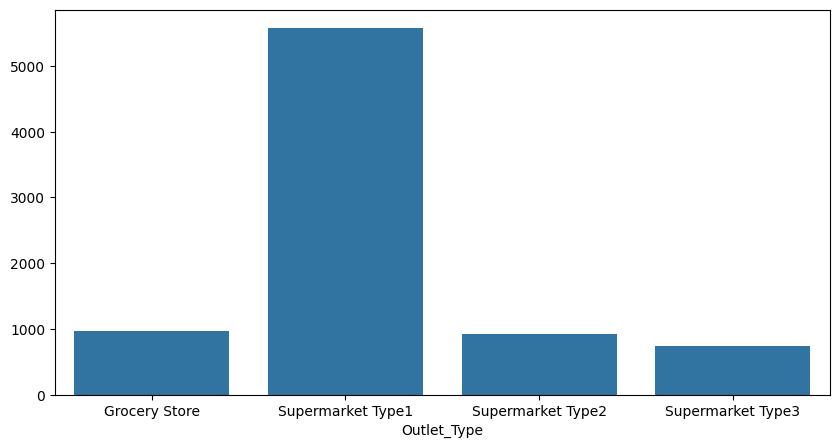

In [ ]:
plt.figure(figsize=(10,5))
Outlet_Type_size=train_df.groupby("Outlet_Type").size()
sns.barplot(data=Outlet_Type_size)

There are very high sales from Supermarket Type1.

<Axes: xlabel='Outlet_Size'>

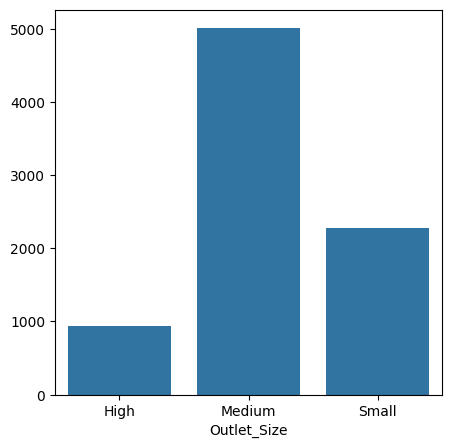

In [ ]:
plt.figure(figsize=(5,5))
Outlet_Size_size=train_df.groupby("Outlet_Size").size()
sns.barplot(data=Outlet_Size_size)

There are very high sales in Medium Sized outlets.

<BarContainer object of 16 artists>

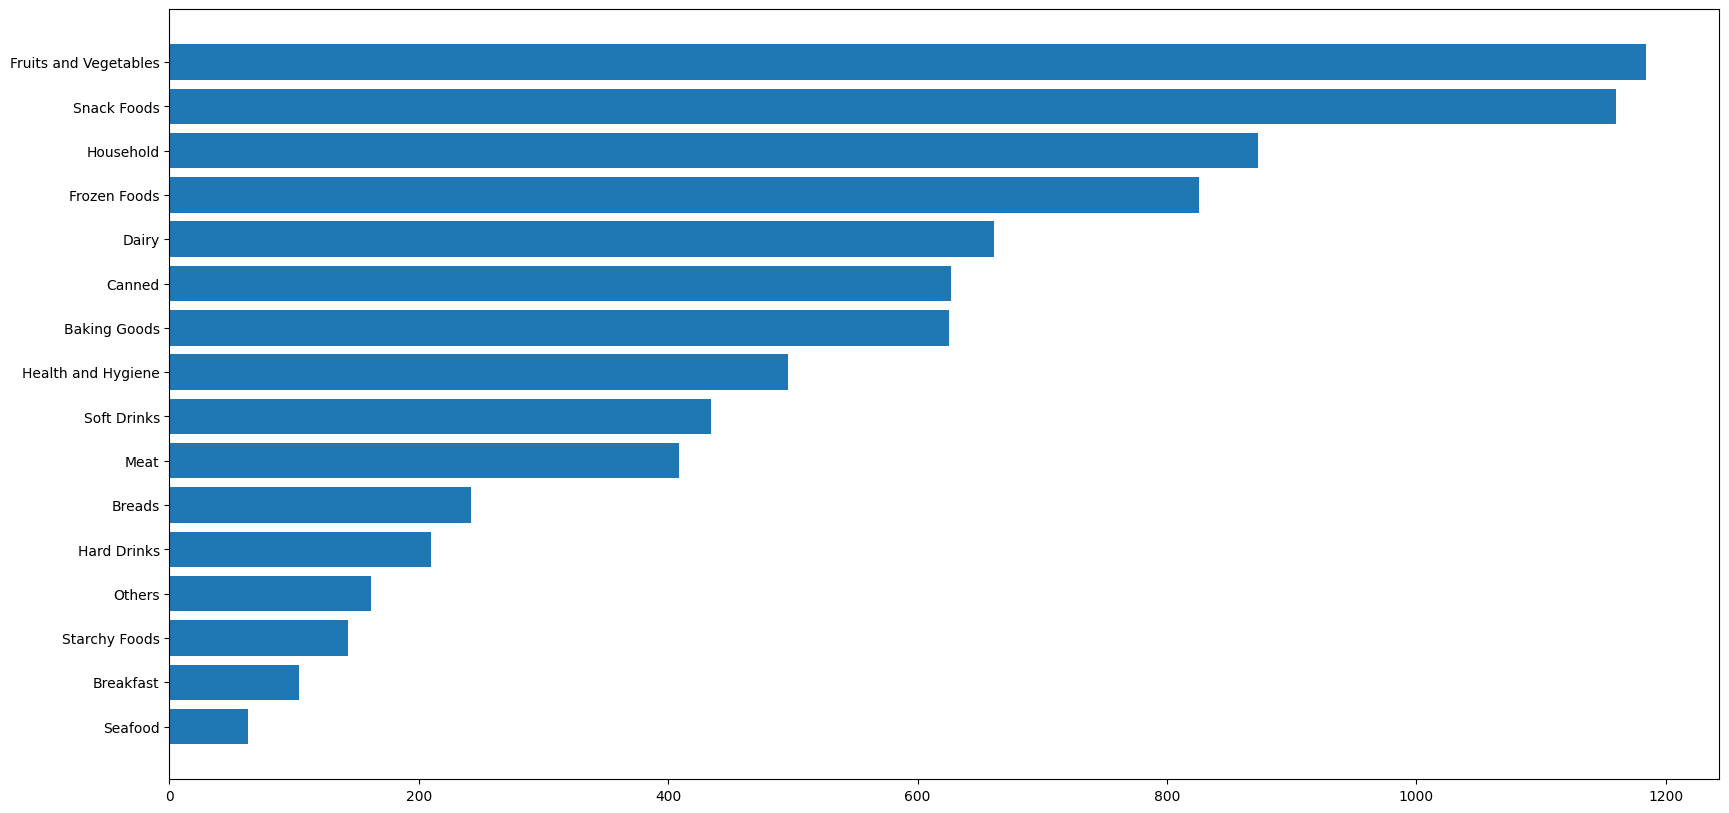

In [ ]:
plt.figure(figsize=(20,10))

Item_Type_size=train_df.groupby("Item_Type").size().sort_values()
Item_Type_size
plt.barh(Item_Type_size.index,Item_Type_size.values)

Fruits and Vegetables , Snacks Foods are most sold items.

<Axes: >

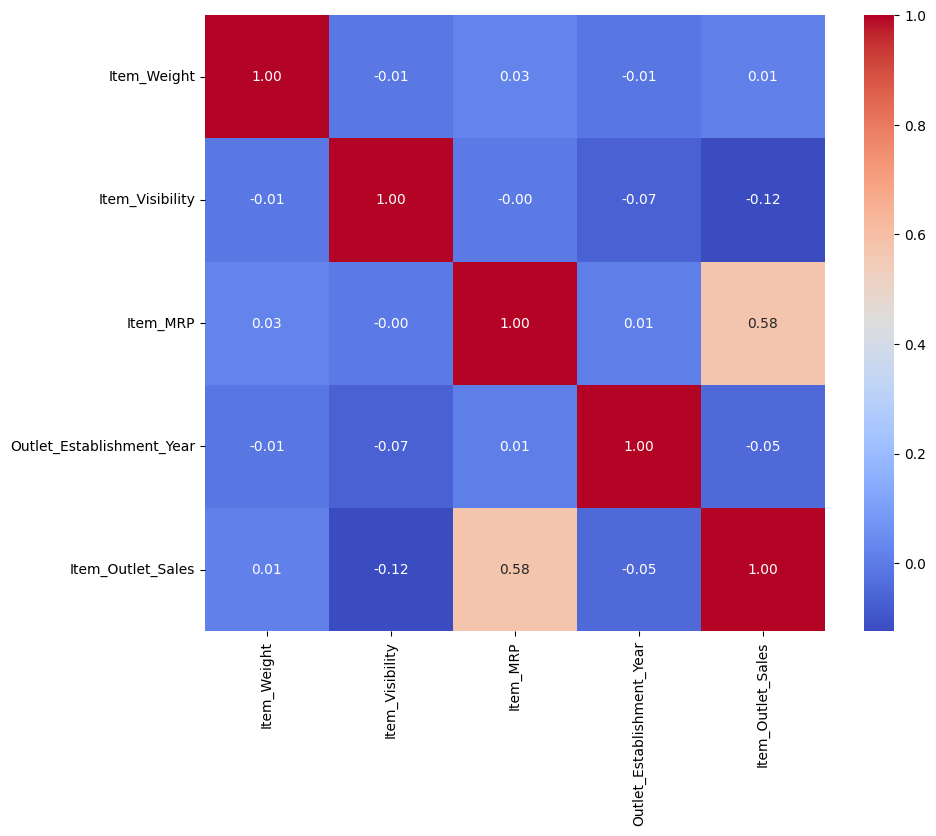

In [ ]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Item_MRP and Item_Outlet_Sales are highly correlated

In [ ]:
train_df["Item_Visibility"][train_df["Item_Visibility"]==0].count()

511

There are 511 items which has 0 visibility.

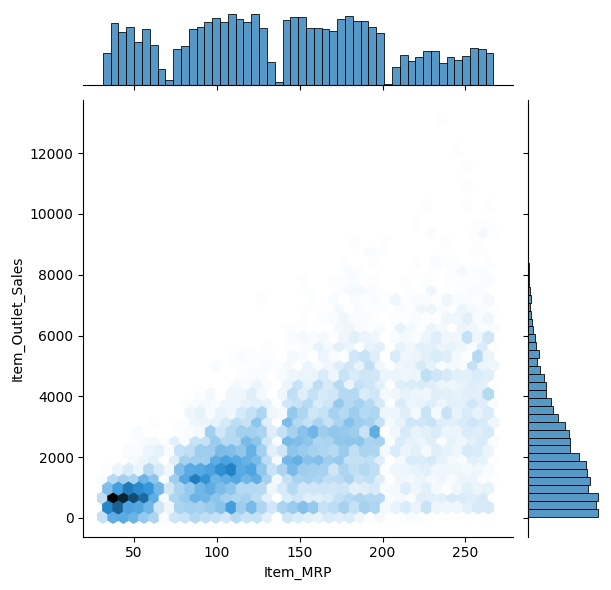

In [ ]:
g=sns.jointplot(x="Item_MRP",y="Item_Outlet_Sales",data=train_df,kind="hex",marginal_kws=dict(bins=50, fill=True))

plt.show()

Dividing columns into dependent and independent columns

In [ ]:
x_train=train_df.iloc[:,0:11]
y_train=train_df.iloc[:,11]

Label Encoding the data

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
label_encoder = LabelEncoder()
x_train_encoded = pd.DataFrame(index=train_df.index)
for column in train_df.columns:
    if column in numerical_columns:

        x_train_encoded[column] = train_df[column]
    else:

        x_train_encoded[column] = label_encoder.fit_transform(train_df[column])

x_train_encoded = x_train_encoded.reindex(columns=train_df.columns)

print(x_train_encoded.head())


   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              660        17.50                 0         0.016760         10   
3             1117        19.20                 1         0.000000          6   
4             1293         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            1   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0         

Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
float_columns = x_train_encoded.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
for i in float_columns:

  x_train_encoded[i] = scaler.fit_transform(x_train_encoded[i].values.reshape(-1,1))
x_train_encoded.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.767612,0,-0.972396,4,1.747637,9,1999,1,0,1,0.927621
1,8,-1.495509,1,-0.909213,14,-1.485586,3,2009,1,2,2,-1.028318
2,660,0.998295,0,-0.958458,10,0.011970,9,1999,1,0,1,-0.045601
3,1117,1.364397,1,-1.286214,6,0.661326,0,1998,1,2,0,-0.856619
4,1293,-0.847293,0,-1.286214,9,-1.395873,1,1987,0,2,1,-0.700746
5,755,-0.531798,1,-1.286214,0,-1.435347,3,2009,1,2,2,-0.961063
6,693,0.169180,1,-1.037052,13,-1.334952,1,1987,0,2,1,-1.087661
7,735,1.321326,0,1.206560,13,-0.531164,5,1985,1,2,3,1.098529
8,439,0.718334,1,-0.959884,5,-0.704257,7,2002,1,1,1,-0.652084
9,986,1.364397,1,0.560823,5,0.753192,2,2007,1,1,1,1.507203


In [ ]:
x_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8219 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8219 non-null   int64  
 1   Item_Weight                8219 non-null   float64
 2   Item_Fat_Content           8219 non-null   int64  
 3   Item_Visibility            8219 non-null   float64
 4   Item_Type                  8219 non-null   int64  
 5   Item_MRP                   8219 non-null   float64
 6   Outlet_Identifier          8219 non-null   int64  
 7   Outlet_Establishment_Year  8219 non-null   int64  
 8   Outlet_Size                8219 non-null   int64  
 9   Outlet_Location_Type       8219 non-null   int64  
 10  Outlet_Type                8219 non-null   int64  
 11  Item_Outlet_Sales          8219 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 834.7 KB


## Test Data Operations

In [ ]:
test_df=pd.read_csv("/content/Test.csv")

### Data preproccessing

In [ ]:
for i in test_df.columns[test_df.dtypes=="object"]:
  test_df[i]=test_df[i].astype("category")
test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0],inplace=True)
grp=test_df.groupby("Item_Identifier").groups
def fill_missing_weight(df, grp):
  def g(group):
    return group.fillna(group.bfill())


  return df.groupby('Item_Identifier')['Item_Weight'].transform(g)

test_df["Item_Weight"] = fill_missing_weight(test_df.copy(), grp)
test_df.dropna(inplace=True)